It learns how the players and teams have performed against the opposite team previously and trains the model.

Step 1: Importing libraries like NumPy, Pandas, Scikit-learn, TensorFlow, and Matplotlib.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

Step 2: Loading the dataset

In [35]:
df=pd.read_csv('/kaggle/input/ipl-dataset/ipl_data.csv')

In [36]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


Dropping unimportant features

In [37]:
df.shape

(76014, 15)

In [38]:
df = df.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [39]:
df.shape

(76014, 6)

In [40]:
df.isnull().sum()

venue        0
bat_team     0
bowl_team    0
batsman      0
bowler       0
total        0
dtype: int64

Splitting the data

In [41]:
X = df.drop(['total'], axis =1)
y = df['total']

Label Encoding

We have applied label encoding to your categorical features in X.
We have created separate LabelEncoder objects for each categorical feature and encoded their values.
We have created mappings to convert the encoded labels back to their original values, which can be helpful for interpreting the results.

In [42]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

Train test split

In [43]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

Feature Scaling

We have performed Min-Max scaling on our input features to ensure all the features are on the same scale
Scaling is performed to ensure consistent scale to improve model performance.

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 3: Defining the Neural Network
We have defined a neural network using TensorFlow and Keras for regression.
After defining the model, we have compiled the model using the Huber Loss.

In [45]:
#defining the neural network
model=keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)), # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression


Step 4: Model training

In [46]:
model.fit(X_train_scaled,y_train,epochs=50,batch_size=64,validation_data=(X_test_scaled,y_test))

Epoch 1/50
832/832 [==============================] - 2s 2ms/step - loss: 68.0792 - val_loss: 31.3503
Epoch 2/50
832/832 [==============================] - 1s 1ms/step - loss: 29.4658 - val_loss: 27.2631
Epoch 3/50
832/832 [==============================] - 1s 1ms/step - loss: 25.2644 - val_loss: 23.4485
Epoch 4/50
832/832 [==============================] - 1s 1ms/step - loss: 22.7967 - val_loss: 22.2336
Epoch 5/50
832/832 [==============================] - 1s 1ms/step - loss: 22.3852 - val_loss: 22.1493
Epoch 6/50
832/832 [==============================] - 1s 1ms/step - loss: 22.3626 - val_loss: 22.1400
Epoch 7/50
832/832 [==============================] - 1s 1ms/step - loss: 22.3631 - val_loss: 22.1728
Epoch 8/50
832/832 [==============================] - 1s 1ms/step - loss: 22.3618 - val_loss: 22.1291
Epoch 9/50
832/832 [==============================] - 1s 1ms/step - loss: 22.3501 - val_loss: 22.1274
Epoch 10/50
832/832 [==============================] - 1s 1ms/step - loss: 22.3447

After the training, we have stored the training and validation loss values to our neural network during the training process.

<Axes: >

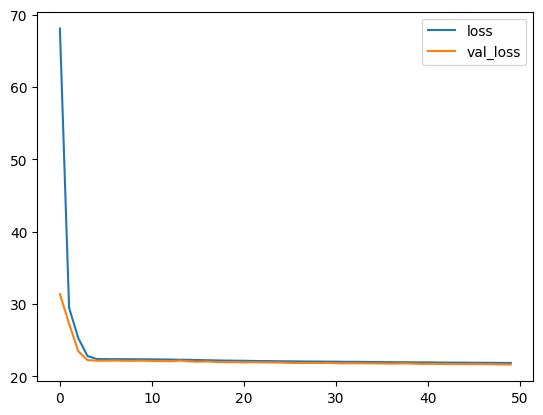

In [47]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

Step 5: Model evaluation

In [48]:
# Make predictions
predictions = model.predict(X_test_scaled)
 
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 [==============================] - 1s 786us/step


22.11792743116637

Step 6: Creating a widget
We have created an interactive widget using ipywidgets to predict the score based on user input for venue, batting team, bowling team, striker, and bowler.

In [53]:
import ipywidgets as widgets
from IPython.display import display, clear_output
 
import warnings
warnings.filterwarnings("ignore")
 
venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')
 
predict_button = widgets.Button(description="Predict Score")
 
def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
         
 
        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])
 
 
        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])
 
        print(predicted_score)

Widget-based interface


In [52]:
#setup the button
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()